In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
df = pd.read_csv('train.csv')
# Taking 30 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
df = df.head(2300)
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = 'Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 2300/2300 [00:05<00:00, 450.83it/s]


In [4]:
X.shape

(2300, 350, 350, 3)

In [5]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(2300, 25)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [7]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 348, 348, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 174, 174, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 172, 172, 32)      1

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


65/65 [==============================] - 52s 731ms/step - loss: 0.7678 - accuracy: 0.0899 - val_loss: 1.4429 - val_accuracy: 0.0130
Epoch 2/5
65/65 [==============================] - 45s 700ms/step - loss: 0.5768 - accuracy: 0.1700 - val_loss: 3.1403 - val_accuracy: 0.3565
Epoch 3/5
65/65 [==============================] - 45s 695ms/step - loss: 0.3813 - accuracy: 0.2338 - val_loss: 1.7702 - val_accuracy: 0.2000
Epoch 4/5
65/65 [==============================] - 66s 1s/step - loss: 0.2872 - accuracy: 0.2971 - val_loss: 0.5903 - val_accuracy: 0.2261
Epoch 5/5
65/65 [==============================] - 57s 879ms/step - loss: 0.2547 - accuracy: 0.3314 - val_loss: 0.4366 - val_accuracy: 0.1739


In [11]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

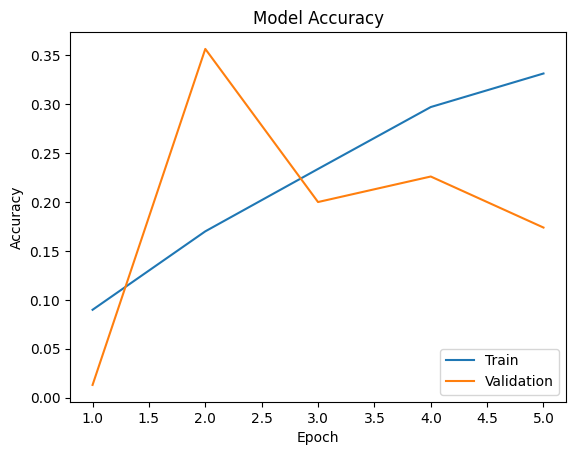

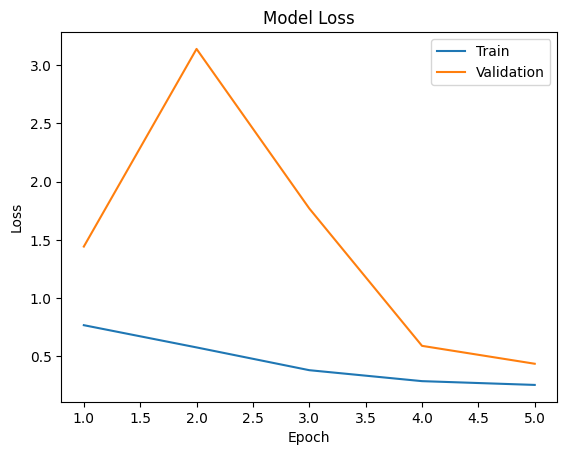

In [12]:
plotLearningCurve(history,5)

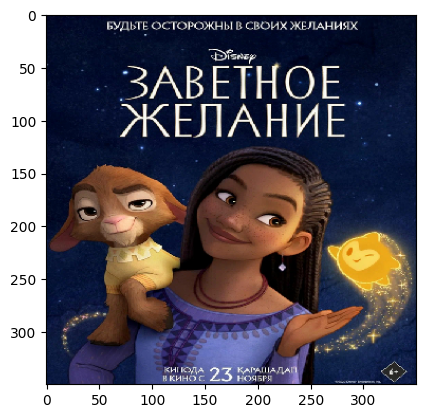

1/1 [==============================] - 0s 24ms/step
Drama: 47.69%
Crime: 19.74%
Comedy: 2.29%
Sci-Fi: 2.13%
Romance: 1.83%
Musical: 0.42%
Mystery: 0.25%
N/A: 0.21%
Thriller: 0.16%
Action: 0.11%
Horror: 0.07%
War: 0.05%
Short: 0.02%
Reality-TV: 0.01%
Biography: 0.01%
Western: 0.01%
Music: 0.00%
Adventure: 0.00%
Family: 0.00%
Fantasy: 0.00%
History: 0.00%
Sport: 0.00%
Animation: 0.00%
Documentary: 0.00%
News: 0.00%


In [31]:
img = image.load_img('testing/заветное желание.png', target_size=(width, height, 3))
plt.imshow(img)
plt.show()  # Отображаем изображение
img = image.img_to_array(img)
img = img / 255.0
img = img.reshape(1, width, height, 3)
classes = df.columns[2:]
y_pred = model.predict(img)

# Получаем индексы всех жанров, отсортированные по убыванию вероятности
sorted_indices = np.argsort(y_pred[0])[::-1]

# Выводим названия жанров и соответствующие вероятности в порядке убывания
for i in sorted_indices:
    print(f"{classes[i]}: {y_pred[0][i] * 100:.2f}%")